In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1

In [2]:
# Creating a 1-D vector

data_arr = np.array([x for x in range(0, 12)])
data_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
# Reshaping the array

data = data_arr.reshape(4, 3)
data

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [4]:
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


/tmp/ipykernel_141981/246388159.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index)


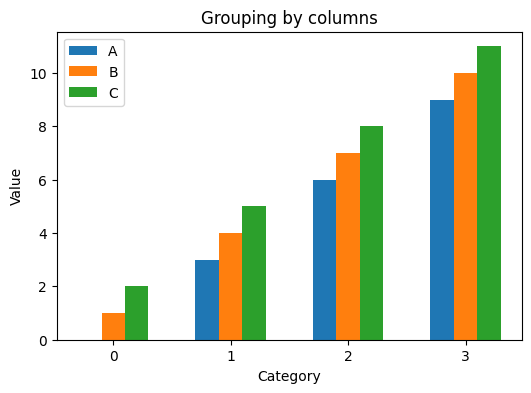

In [5]:
# First plot (Fig 3.26 (B))

fig, ax = plt.subplots(figsize=(6, 4))

# Setting bar width
width = 0.20
multiplier = 0

# Plotting all the columns
for col in df.columns:
    offset = width * multiplier
    ax.bar(df.index + offset, df[col], width, label=col)
    multiplier += 1

# Setting labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Grouping by columns')

# Customizing x-ticks
ax.set_xticklabels(df.index)
ax.set_xticks(df.index+width)

# Legend
ax.legend()

plt.show();

In [6]:
# Transposing the DataFrame

new_df = df.T
new_df

,0,1,2,3
A,0,3,6,9
B,1,4,7,10
C,2,5,8,11


/tmp/ipykernel_141981/1774915448.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_df.index)


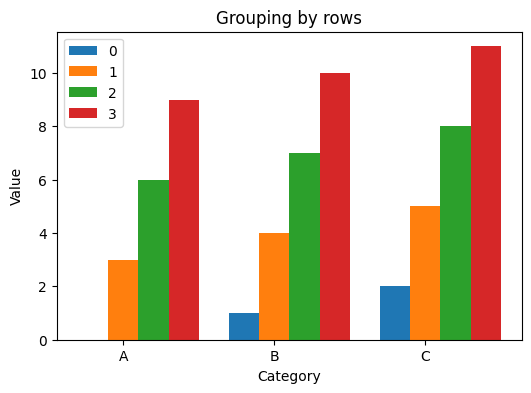

In [7]:
# Second plot (Fig 3.26 (C))

fig, ax = plt.subplots(figsize=(6, 4))

# Setting bar width
width = 0.20
multiplier = 0

# Need to convert new_df index in numerical form to shift each column by the offset.
x = np.arange(len(new_df.index))

# Plotting all the columns
for col in new_df.columns:
    offset = width * multiplier
    ax.bar(x+offset, new_df[col], width, label=col)
    multiplier += 1

# Setting labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Grouping by rows')

# Customizing x-ticks
ax.set_xticklabels(new_df.index)
ax.set_xticks(x+width)

# Legend
ax.legend()

Exercise Completed.

## Exercise 2

In [8]:
# List of Columns

cols = [x for x in range(1,7)]
cols

[1, 2, 3, 4, 5, 6]

In [9]:
# Corresponding means

means = [(x + 1) **2 for x in cols]
means

[4, 9, 16, 25, 36, 49]

In [10]:
# Corresponding standard deviations

stds = [30*((2*x / 5) - 1)**2 for x in cols]
stds

[10.799999999999999,
 1.1999999999999993,
 1.1999999999999993,
 10.800000000000002,
 30.0,
 58.79999999999999]

In [11]:
# Empty DataFrame

df = pd.DataFrame()
df

""


In [12]:
# Adding values to the Dataframe

for i in range(0,6):
    df[cols[i]] = np.random.normal(means[i], stds[i], 30)

In [13]:
# Checking dataframe

df.head()

,1,2,3,4,5,6
0,-0.652290,9.820504,16.545572,30.895318,16.356708,50.747000
1,13.637525,8.733883,17.145933,18.000507,60.960239,70.014274
2,7.974303,9.584237,17.315861,38.264612,-21.921240,60.413784
3,13.815774,10.051394,16.057477,24.146041,35.478401,-21.099749
4,-5.308869,8.326762,15.947815,36.805575,29.005132,151.059812


Text(0.5, 1.0, 'C) Error bar plot')

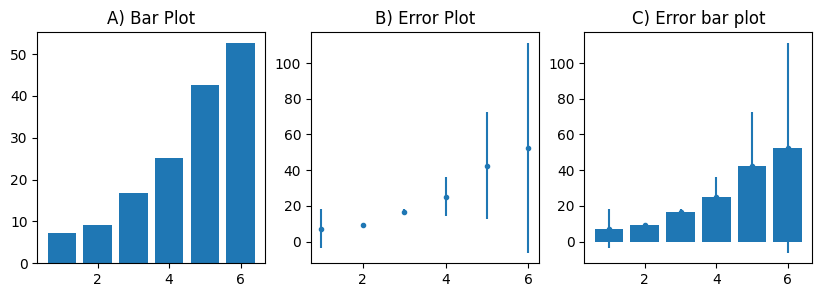

In [14]:
# Plotting

# Creating 3 figures in one row
fig, ax = plt.subplots(1, 3, figsize=(10,3))

# A plot
ax[0].bar(x=cols, height=[df[col].mean() for col in cols])
ax[0].set_title('A) Bar Plot')

# B plot
ax[1].errorbar(x=cols, y=[df[col].mean() for col in cols], yerr=stds, marker='.', linestyle='')
ax[1].set_title('B) Error Plot')

# C plot
ax[2].bar(x=cols, height=[df[col].mean() for col in cols])
ax[2].errorbar(x=cols, y=[df[col].mean() for col in cols], yerr=stds, marker='.', linestyle='')
ax[2].set_title('C) Error bar plot')

Exercise Completed.

## Exercise 3

In [15]:
# Data dict

d = {
    'Chocolate': 24,
     'Vanilla' : 16,
  'Strawberry' :  7,
   'Pistachio' : 16
   }

In [16]:
data = pd.Series(d, index=d.keys())
data

Chocolate     24
Vanilla       16
Strawberry     7
Pistachio     16
dtype: int64

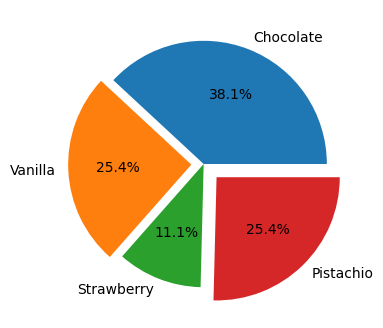

In [17]:
# Plot

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(data, labels=data.index, autopct="%1.1f%%", explode=[0, 0.1, 0, 0.15]);

Exercise Completed.

## Exercise 4